# **1. Understanding the Problem and Objective:**
Before diving into the data, we need understand the problem we are trying to solve and the goals of our analysis. This helps in directing our exploration and identifying relevant patterns.For this Health Insurance data,this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **2. Importing libraries and Loading the Dataset:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_test = pd.read_csv('/content/test.csv')
df = pd.read_csv('/content/train.csv')

# **3. Checking the Structure of the Dataset:**

In [3]:
# check head of the df

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [6]:
df.shape

(381109, 12)

In [7]:
df.columns.tolist()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [8]:
df_test.columns.tolist()

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

# **4. Checking the Duplicate and Missing Values in the Dataset:**

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(381109, 12)

In [10]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


As We Can See There Are No Duplicate Values And Missing Values


# **5. Exploratory Data Analysis(EDA)**

In [ ]:
sns.set(style="whitegrid")

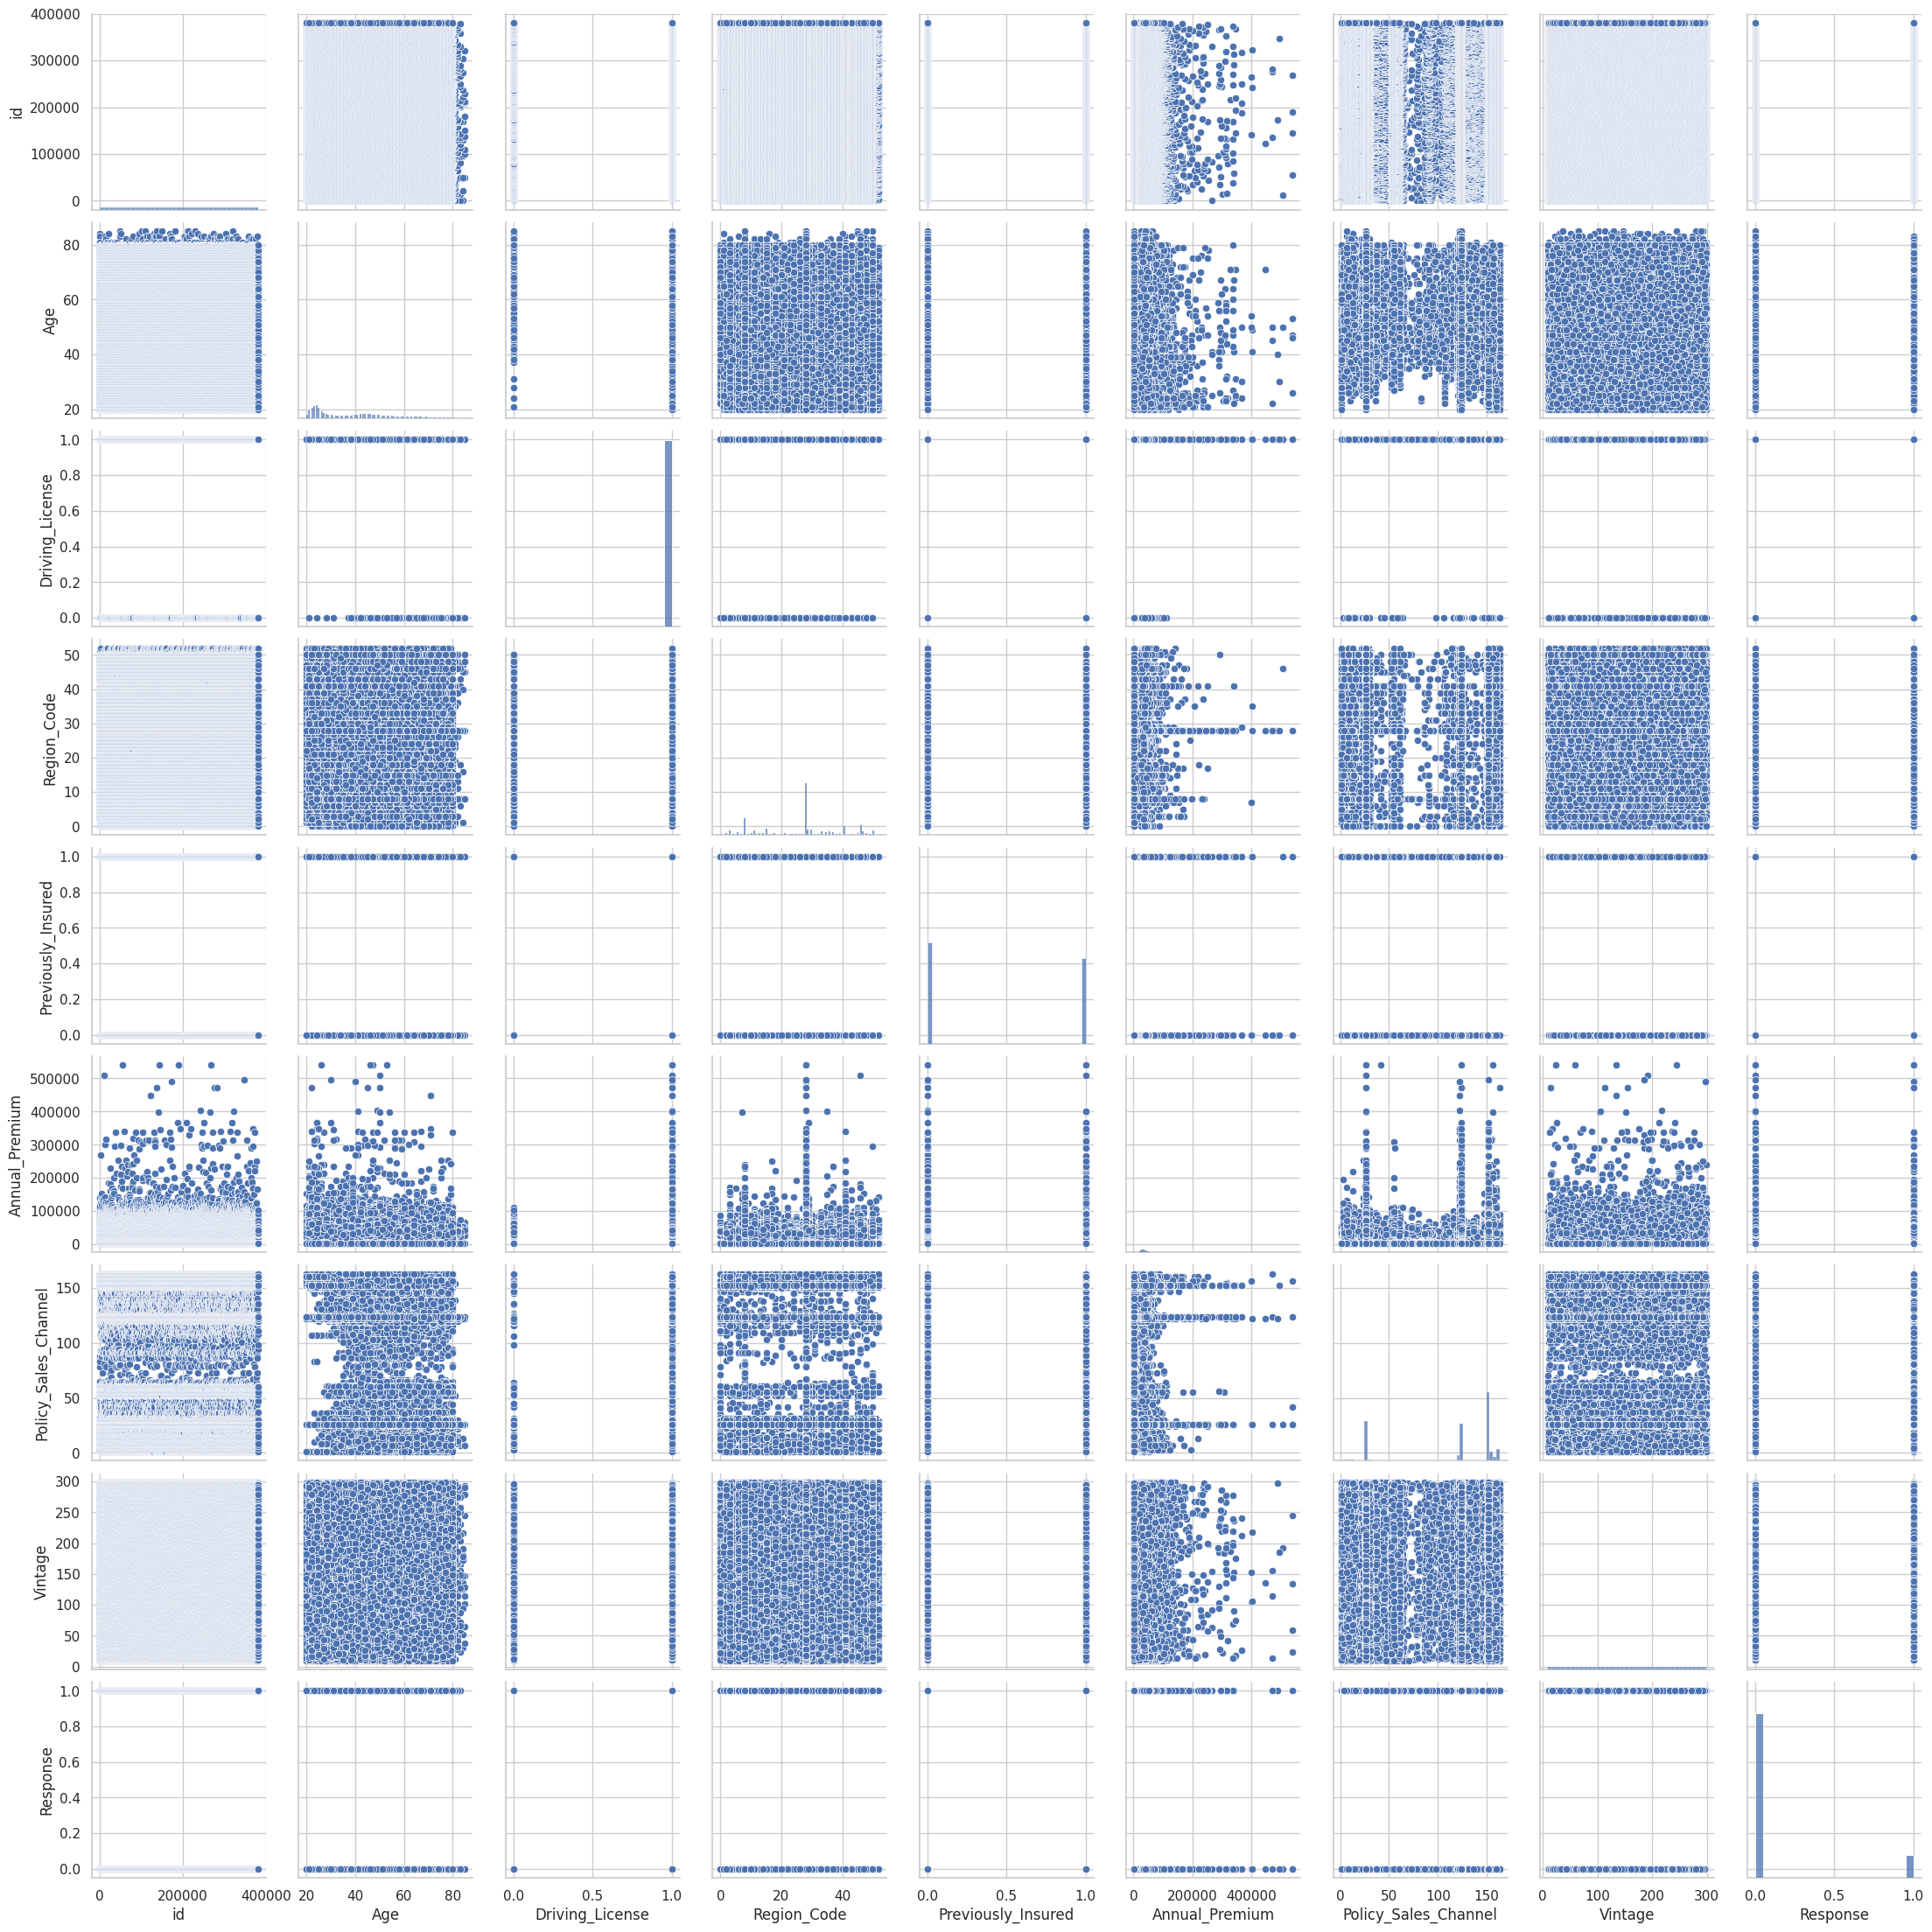

In [ ]:
sns.pairplot(df)

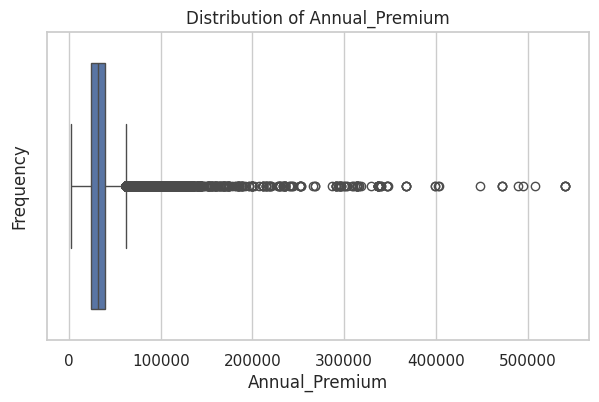

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

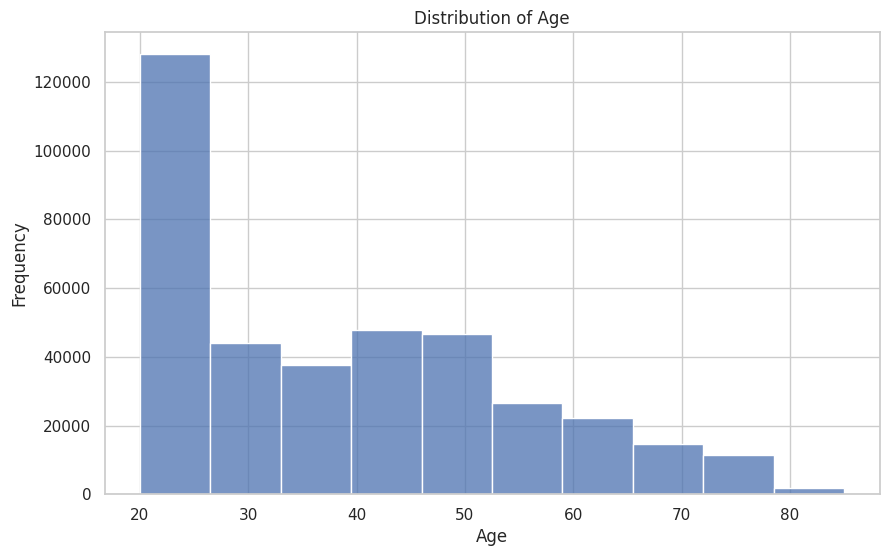

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

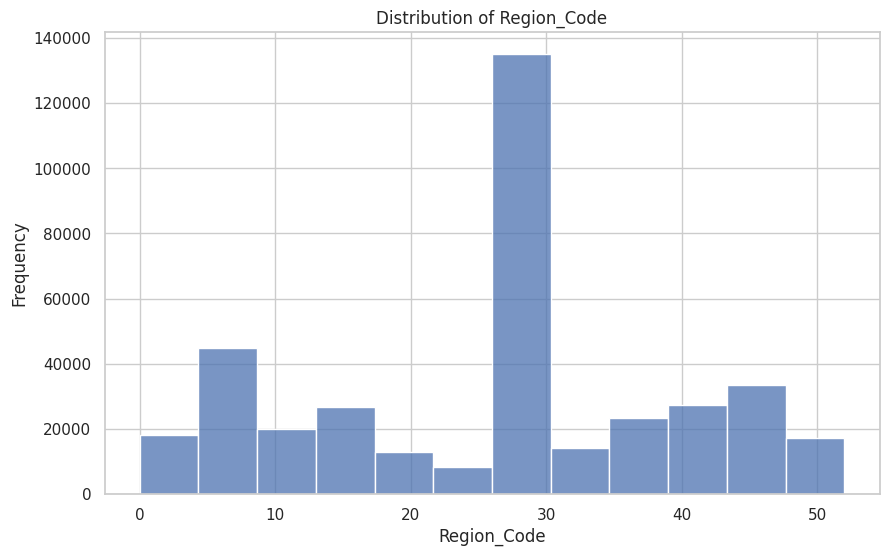

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

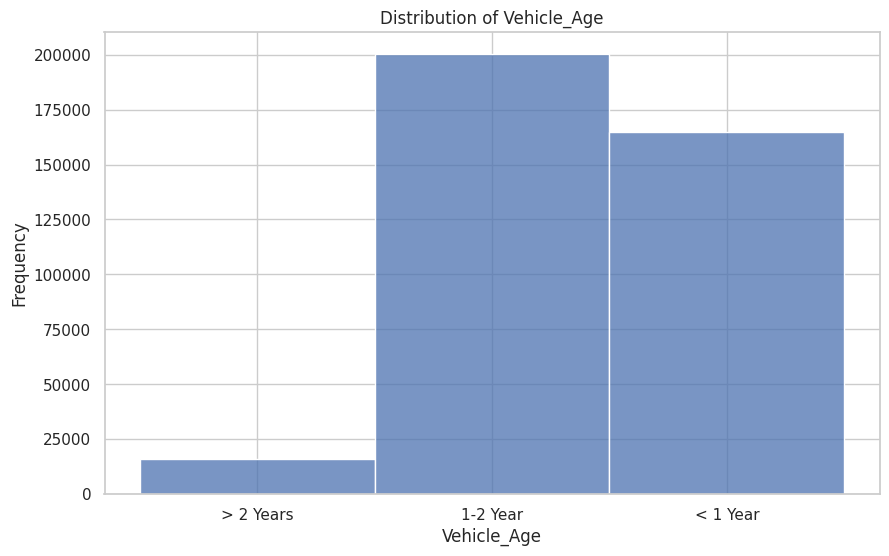

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

##**Checking If training data is Imbalanced**

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

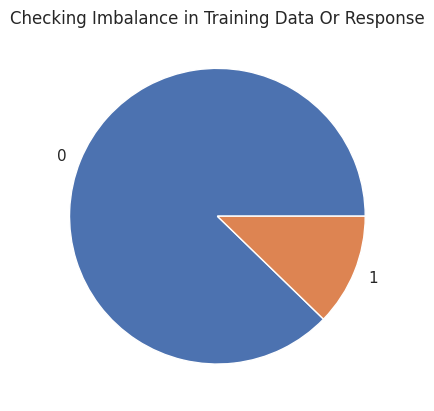

In [ ]:
response_data = df['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')


In [ ]:
# Calculate percentage of each class (0 and 1) in 'Response' column
response_percentages = df['Response'].value_counts(normalize=True).mul(100).round(2)

# Print percentages
print("Percentage of each class in 'Response':")
print(response_percentages)

# Optionally, format as string with % sign
response_percentages_str = response_percentages.astype(str) + '%'
print("\nPercentage with % sign:")
print(response_percentages_str)

Percentage of each class in 'Response':
Response
0    87.74
1    12.26
Name: proportion, dtype: float64

Percentage with % sign:
Response
0    87.74%
1    12.26%
Name: proportion, dtype: object


# **6. Feature Engineering**

In [11]:
df.info()
print('\n')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB




,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [13]:
df['Vehicle_Damages'] = df['Vehicle_Damage'].apply(veh_a)
df.drop(['Vehicle_Damage'],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages
0,1,Male,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,1
1,2,Male,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,0
2,3,Male,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,1
3,4,Male,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,0
4,5,Female,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,30170.0,26.0,88,0,0
381105,381106,Male,30,1,37.0,1,< 1 Year,40016.0,152.0,131,0,0
381106,381107,Male,21,1,30.0,1,< 1 Year,35118.0,160.0,161,0,0
381107,381108,Female,68,1,14.0,0,> 2 Years,44617.0,124.0,74,0,1


In [14]:
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df = pd.get_dummies(df, columns=['Vehicle_Age'])
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,1,False,False,True
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0,0,True,False,False
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,1,False,False,True
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0,0,False,True,False
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0,0,False,True,False


In [15]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [16]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [17]:
df_test['Vehicle_Damages'] = df_test['Vehicle_Damage'].apply(veh_a)
df_test.drop(['Vehicle_Damage'],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages
0,381110,Male,25,1,11.0,1,< 1 Year,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,33762.0,7.0,111,1
2,381112,Male,47,1,28.0,0,1-2 Year,40050.0,124.0,199,1
3,381113,Male,24,1,27.0,1,< 1 Year,37356.0,152.0,187,1
4,381114,Male,27,1,28.0,1,< 1 Year,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,28700.0,122.0,165,1
127034,508144,Male,21,1,46.0,1,< 1 Year,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,62875.0,26.0,265,0


In [18]:
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Vehicle_Age'])
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,381110,Male,25,1,11.0,1,No,35786.0,152.0,53,0,False,True,False
1,381111,Male,40,1,28.0,0,Yes,33762.0,7.0,111,1,True,False,False
2,381112,Male,47,1,28.0,0,Yes,40050.0,124.0,199,1,True,False,False
3,381113,Male,24,1,27.0,1,Yes,37356.0,152.0,187,1,False,True,False
4,381114,Male,27,1,28.0,1,No,59097.0,152.0,297,0,False,True,False


In [19]:
df_test['Gender'] = df_test['Gender'].astype('category')
df_test = pd.get_dummies(df_test, columns=['Gender'],drop_first=True)

df['Gender'] = df['Gender'].astype('category')
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

In [20]:
df = df.drop(['Vehicle_Damage'],axis=1)
df_test = df_test.drop(['Vehicle_Damage'],axis=1)

"Vehicle_Damage" is being dropped is because you already converted it into a numeric representation (Vehicle_Damages) earlier.

# **7. SPLITTING DATA**

In [21]:
X_train = df[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damages', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Gender_Male']]
y_train = df['Response']

X_test = df_test[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damages', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Gender_Male']]

In [22]:
y_test

NameError: name 'y_test' is not defined

In [23]:
response_percentages = y_test.value_counts(normalize=True) * 100
print(response_percentages)

NameError: name 'y_test' is not defined

In [24]:
X_test.shape

(127037, 12)

In [25]:
y_train.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [26]:
df_test.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender_Male
0,381110,25,1,11.0,1,35786.0,152.0,53,0,False,True,False,True
1,381111,40,1,28.0,0,33762.0,7.0,111,1,True,False,False,True
2,381112,47,1,28.0,0,40050.0,124.0,199,1,True,False,False,True
3,381113,24,1,27.0,1,37356.0,152.0,187,1,False,True,False,True
4,381114,27,1,28.0,1,59097.0,152.0,297,0,False,True,False,True


# **8. Using Smote To Handle Imblanced Data**

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    334399
1     46710
Name: count, dtype: int64

Response
1    334399
0    334399
Name: count, dtype: int64


# **9. Scaling Data**

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train_smote)
data_scaled = scaler.fit_transform(df)

# **10. Applying ML model**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)

In [31]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(468158, 12) (468158,) (200640, 12) (200640,)


In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [33]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy on Training Data is:",a)
    print(f"Accuracy on Testing Data is:",b)
    print(f"Precision is:",c)
    print(f"Recall is:",d)
    print(f"AUC is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="coolwarm")
    plt.show()

# **LogisticRegression + SMOTE**

Accuracy on Training Data is: 81.65320255127543
Accuracy on Testing Data is: 81.8201754385965
Precision is: 0.7849995548829342
Recall is: 0.8773680649526387
AUC is: 0.9083964382327641

------------------------------------------------------------------------
Confusion Matrix is:


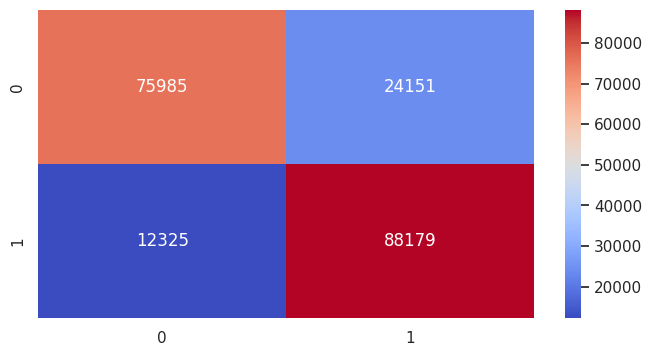

In [ ]:
model_prediction(LogisticRegression())

#**XGBoost + SMOTE + Randomized Search CV**

In [34]:
!pip install xgboost

In [35]:
# Import XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 20, 30],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.8, 1.0, 1.2],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.3, 0.4, 0.5],
    'min_child_weight': [20, 30, 50]
}
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15,
    scoring='recall',   # Optimize for recall
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(x_train, y_train)

print(f"\nBest Random Search Parameters: {random_search.best_params_}")

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f" Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f" Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f" F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Random Search Parameters: {'subsample': 0.4, 'n_estimators': 30, 'min_child_weight': 20, 'max_depth': 3, 'learning_rate': 1.2, 'colsample_bytree': 0.5}
 Accuracy:  0.8594 (85.94%)
 Recall:    0.8874 (88.74%)
 F1-Score:  0.8634 (86.34%)


In [37]:
import pickle
from google.colab import files

# Save the trained model to a .pkl file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Download the saved model file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>